# 1. data pre-processing

In [1]:
import pandas as pd

celltype_maker = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/GO_analysis/midgut_subtype_marker.csv', index_col=0).melt(var_name='type', value_name='name')
celltype_score = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/GO_analysis/midgut_subtype_marker_score.csv', index_col=0).melt(var_name='type', value_name='score')

In [2]:
celltype_maker.type = celltype_maker.type.str.split('names.').str[1]
celltype_score.type = celltype_score.type.str.split('scores.').str[1]

celltype_maker['type'] = [f"{i}_{k}" for i, k in enumerate(celltype_maker['type'].tolist())]
celltype_score['type'] = [f"{i}_{k}" for i, k in enumerate(celltype_score['type'].tolist())]

In [3]:
merged_data = celltype_maker.merge(celltype_score, on='type')

In [4]:
filtered_merged_data = merged_data[merged_data['score'] > 0.5]

In [5]:
filtered_merged_data

,type,name,score
0,0_adult.midgut.progenitors,sna,0.597076
1,1_adult.midgut.progenitors,hdc,0.596462
200,200_AMP.EE.progenitors,ase,0.670562
201,201_AMP.EE.progenitors,insb,0.601080
202,202_AMP.EE.progenitors,spdo,0.582180
...,...,...,...
3211,3211_gastric.caecum,BBS1,0.560712
3212,3212_gastric.caecum,CG8661,0.549079
3213,3213_gastric.caecum,CG17145,0.532496
4400,4400_midgut.primordium,wb,0.574209


In [6]:
genes_list = filtered_merged_data['name'].tolist()

# 2. data visualization

In [7]:
import gseapy as gp
import matplotlib.pyplot as plt

gp.get_library_name(organism="fly")

['Allele_LoF_Phenotypes_from_FlyBase_2017',
 'Allele_Phenotypes_from_FlyBase_2017',
 'Anatomy_AutoRIF',
 'Anatomy_AutoRIF_Predicted_zscore',
 'Anatomy_GeneRIF',
 'Anatomy_GeneRIF_Predicted_zscore',
 'Coexpression_Predicted_GO_Biological_Process_2018',
 'Coexpression_Predicted_GO_Cellular_Component_2018',
 'Coexpression_Predicted_GO_Molecular_Function_2018',
 'GO_Biological_Process_2018',
 'GO_Biological_Process_AutoRIF',
 'GO_Biological_Process_AutoRIF_Predicted_zscore',
 'GO_Biological_Process_GeneRIF',
 'GO_Biological_Process_GeneRIF_Predicted_zscore',
 'GO_Cellular_Component_2018',
 'GO_Cellular_Component_AutoRIF',
 'GO_Cellular_Component_AutoRIF_Predicted_zscore',
 'GO_Cellular_Component_GeneRIF',
 'GO_Cellular_Component_GeneRIF_Predicted_zscore',
 'GO_Molecular_Function_2018',
 'GO_Molecular_Function_AutoRIF',
 'GO_Molecular_Function_AutoRIF_Predicted_zscore',
 'GO_Molecular_Function_GeneRIF',
 'GO_Molecular_Function_GeneRIF_Predicted_zscore',
 'Human_Disease_from_FlyBase_2017',
 

In [8]:
def go_analysis(gene_list, gene_library, outdir, cut_off=0.05):
    enr_res = gp.enrichr(gene_list=gene_list,
                         gene_sets=gene_library,
                         organism='fly',
                         outdir= outdir,
                         cutoff=cut_off)
    
    enr_res.res2d.Term = enr_res.res2d.Term.str.split("\(GO").str[0]

    gp.dotplot(enr_res.res2d,
           figsize=(3,5),
           title=gene_library,
           cmap= plt.cm.autumn_r,
           cutoff=cut_off)

In [9]:
# biological process
'''
enr_res = gp.enrichr(gene_list= genes_list,
                     gene_sets='GO_Biological_Process_2018',
                     organism='fly',
                     outdir='/mnt/c/Users/ouyangkang/Desktop/GO_analysis/')
'''

"\nenr_res = gp.enrichr(gene_list= genes_list,\n                     gene_sets='GO_Biological_Process_2018',\n                     organism='fly',\n                     outdir='/mnt/c/Users/ouyangkang/Desktop/GO_analysis/')\n"

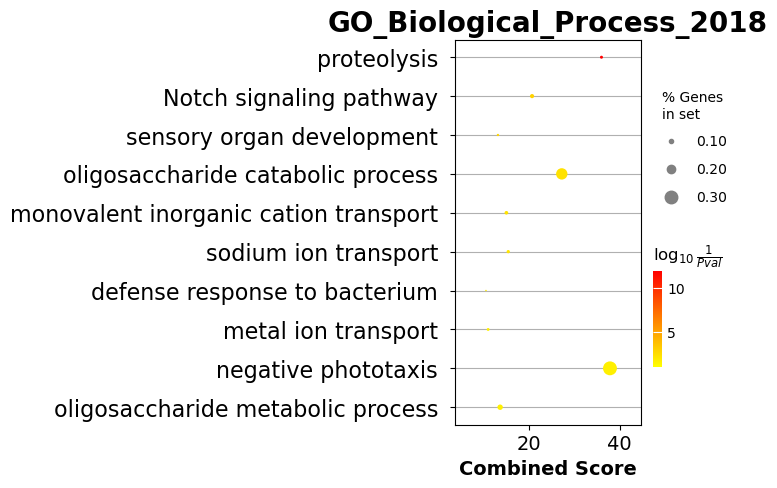

In [10]:
go_analysis(genes_list, 'GO_Biological_Process_2018', '/mnt/c/Users/ouyangkang/Desktop/GO_analysis/enrich_result/score_more_than_0.5/')

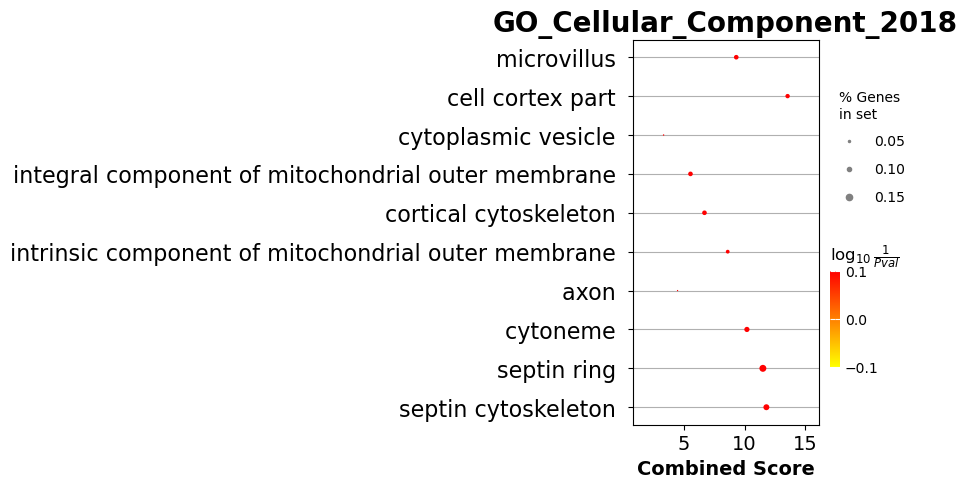

In [12]:
go_analysis(genes_list, 'GO_Cellular_Component_2018', '/mnt/c/Users/ouyangkang/Desktop/GO_analysis/enrich_result/score_more_than_0.5/', cut_off=0.5)

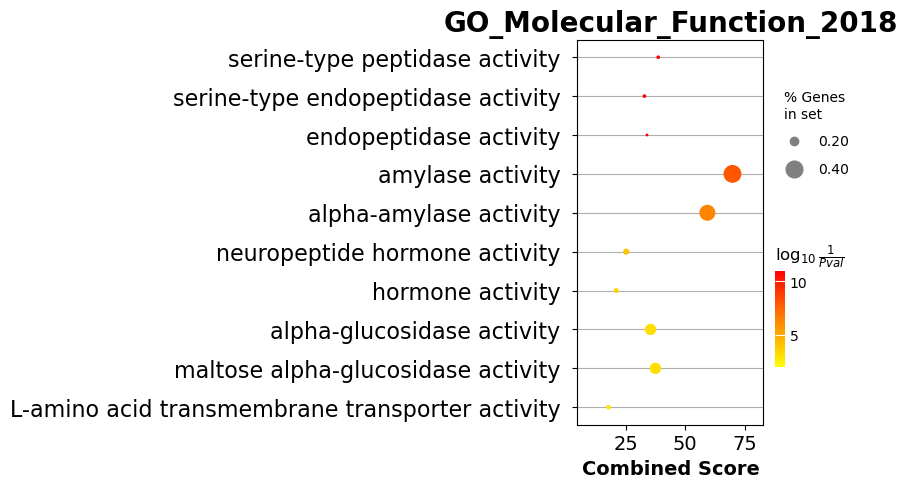

In [13]:
go_analysis(genes_list, 'GO_Molecular_Function_2018', '/mnt/c/Users/ouyangkang/Desktop/GO_analysis/enrich_result/score_more_than_0.5/')

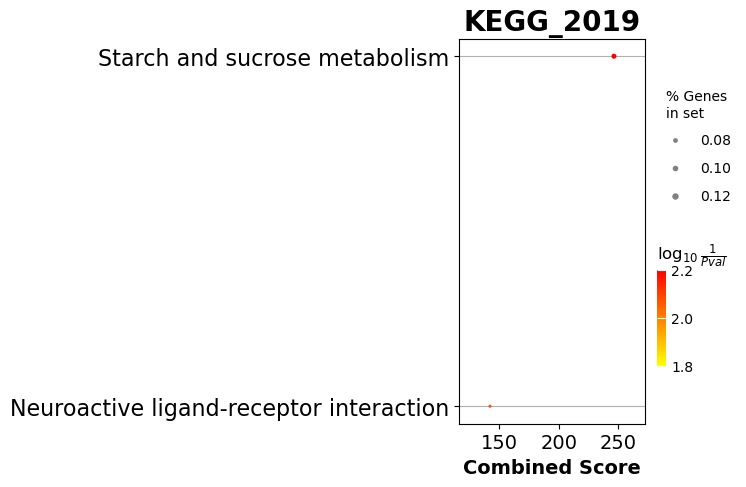

In [14]:
go_analysis(genes_list, 'KEGG_2019', '/mnt/c/Users/ouyangkang/Desktop/GO_analysis/enrich_result/score_more_than_0.5/')

# 3. top 20 percent genes

In [15]:
merged_data

,type,name,score
0,0_adult.midgut.progenitors,sna,0.597076
1,1_adult.midgut.progenitors,hdc,0.596462
2,2_adult.midgut.progenitors,esg,0.490413
3,3_adult.midgut.progenitors,GAPcenA,0.487838
4,4_adult.midgut.progenitors,Sox100B,0.441633
...,...,...,...
4595,4595_midgut.primordium,l(2)05287,0.243710
4596,4596_midgut.primordium,Uhg5,0.243314
4597,4597_midgut.primordium,l(1)G0045,0.242878
4598,4598_midgut.primordium,Tis11,0.242785


In [16]:
top_filtered = merged_data[merged_data.index % 200 < 20]

In [17]:
top_filtered

,type,name,score
0,0_adult.midgut.progenitors,sna,0.597076
1,1_adult.midgut.progenitors,hdc,0.596462
2,2_adult.midgut.progenitors,esg,0.490413
3,3_adult.midgut.progenitors,GAPcenA,0.487838
4,4_adult.midgut.progenitors,Sox100B,0.441633
...,...,...,...
4415,4415_midgut.primordium,Inx3,0.392583
4416,4416_midgut.primordium,CG45116,0.389126
4417,4417_midgut.primordium,Prat,0.383693
4418,4418_midgut.primordium,bowl,0.370207


In [18]:
top_genes_list = top_filtered['name'].tolist()

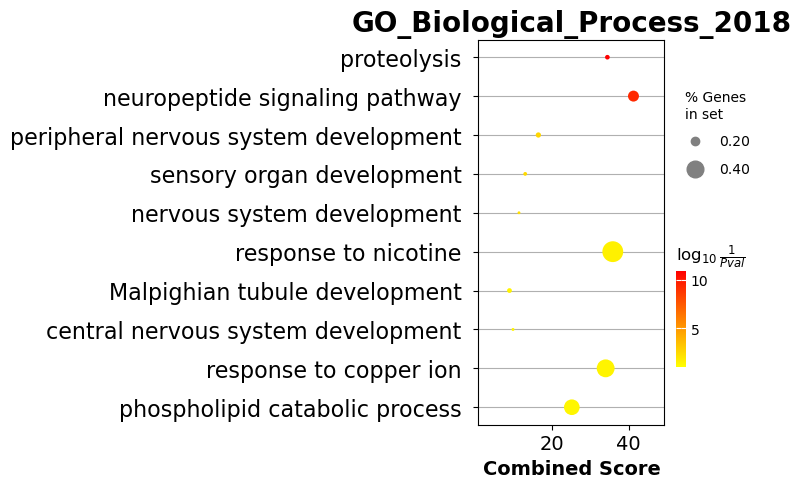

In [19]:
go_analysis(top_genes_list, 'GO_Biological_Process_2018', '/mnt/c/Users/ouyangkang/Desktop/GO_analysis/enrich_result/top_20_percent/')

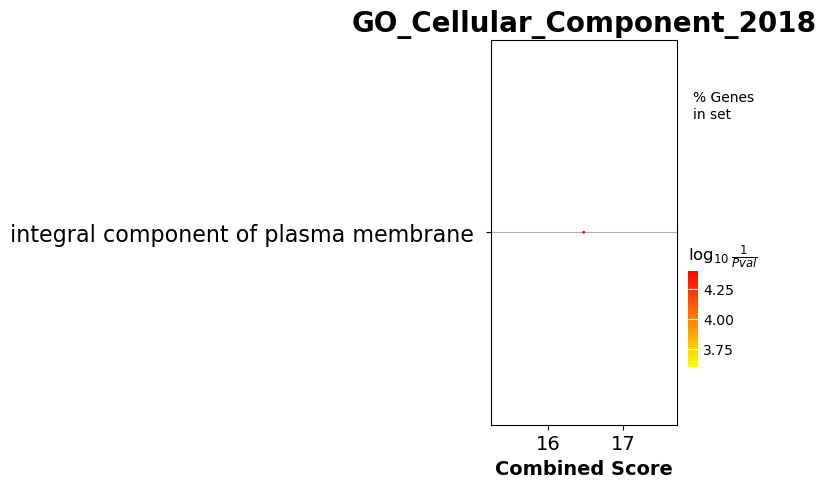

In [23]:
go_analysis(top_genes_list, 'GO_Cellular_Component_2018', '/mnt/c/Users/ouyangkang/Desktop/GO_analysis/enrich_result/top_20_percent/', cut_off=0.1)

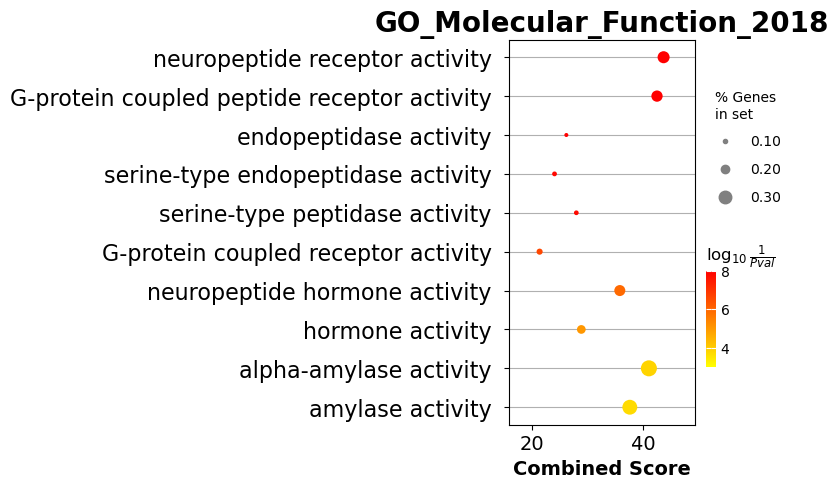

In [21]:
go_analysis(top_genes_list, 'GO_Molecular_Function_2018', '/mnt/c/Users/ouyangkang/Desktop/GO_analysis/enrich_result/top_20_percent/')

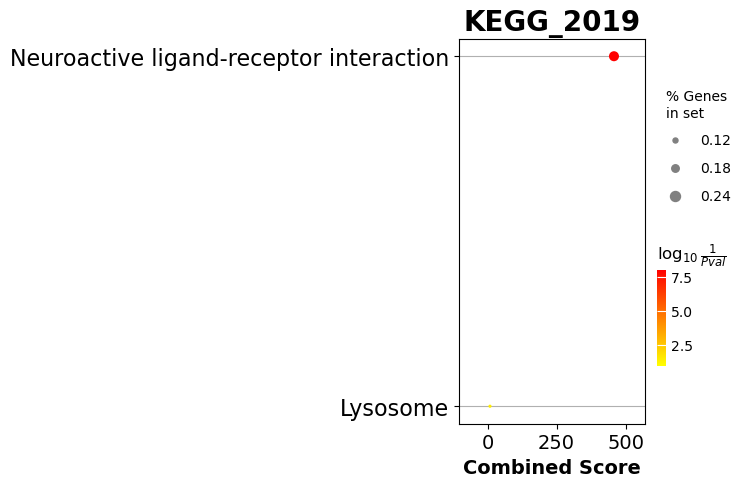

In [22]:
go_analysis(top_genes_list, 'KEGG_2019', '/mnt/c/Users/ouyangkang/Desktop/GO_analysis/enrich_result/top_20_percent/')